In [18]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

## Ejercicio 1 [5.0 puntos]

Dados los valores de los precios de tres activos en el fichero en la ruta `filepath`, analiza cuál sería el activo en el que invertirías y añade la justificación de la decisión.

In [2]:
filepath = "https://raw.githubusercontent.com/alfonso-santos/microcredencial-carteras-python-2023/main/datos_practicas/datos_ejercicio1.csv"

In [7]:
precios_pos_df = pd.read_csv(filepath, index_col=0, parse_dates=True)
precios_pos_df.head()

,Activo 1,Activo 2,Activo 3
0,1.007512,1.172625,0.935687
1,1.034282,1.045326,0.884819
2,1.097240,1.068054,0.933041
3,1.070608,0.978501,0.977994
4,1.133475,0.866147,0.939886


In [28]:
precios_retornos = np.log(precios_pos_df).diff().dropna()
precios_retornos

,Activo 1,Activo 2,Activo 3
1,0.026224,-0.114917,-0.055898
2,0.059091,0.021510,0.053066
3,-0.024571,-0.087572,0.047055
4,0.057061,-0.121967,-0.039745
5,-0.004751,0.040719,-0.028798
...,...,...,...
995,-0.041563,-0.060797,-0.022138
996,-0.023493,-0.007458,0.012668
997,-0.001431,0.045076,0.088113
998,0.042574,-0.084754,-0.032216


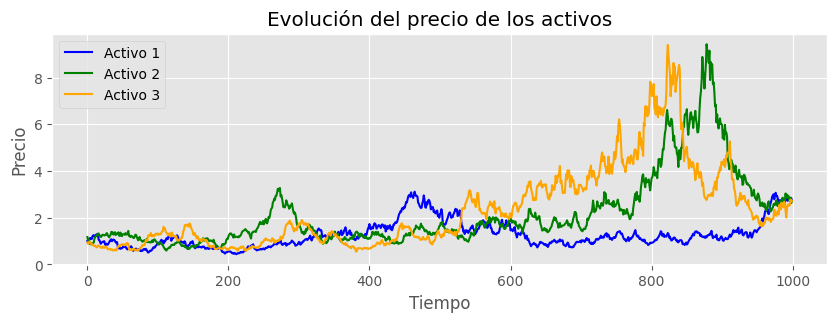

In [31]:
plt.figure(figsize=(10, 3))
plt.plot(precios_pos_df['Activo 1'], label='Activo 1', color='blue')
plt.plot(precios_pos_df['Activo 2'], label='Activo 2', color='green')
plt.plot(precios_pos_df['Activo 3'], label='Activo 3', color='orange')
plt.title(f'Evolución del precio de los activos')
plt.xlabel("Tiempo")
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
media_retornos= precios_retornos.mean()*252
media_retornos

Activo 1    0.250364
Activo 2    0.212082
Activo 3    0.269021
dtype: float64

In [30]:
std_retornos = precios_retornos.std()*np.sqrt(252)
std_retornos

Activo 1    0.942591
Activo 2    0.929752
Activo 3    0.995969
dtype: float64

In [32]:
simetria = precios_retornos.skew()
simetria

Activo 1   -0.845692
Activo 2   -0.018823
Activo 3    0.030535
dtype: float64

In [34]:
curtosis = precios_retornos.kurt()
curtosis

Activo 1    0.447310
Activo 2   -0.004204
Activo 3    1.022480
dtype: float64

Para una mayor seguridad, nos quedariamos con el activo dos, debido a su menor volatilidad y su tendecia más próxima a una distribución normal (simetría) que nos garantiza una menos probabilidad de encontrarnos colas pesadas (curtosis) y los resultados extremos que conllevan. Además, la diferencia en la rentabilidad no es tan grande en comparación a la diferencia de simetría y curtosis.

---

## Ejercicio 2 [5.0 puntos]

Dada la siguiente lista de tickers de activos `["IEF", "AAPL", "BA", "JPM", "TGT", "F"]`, descarga los precios de cierre ajustados diarios a partir del 1 de enero de 2020 y calcula la cartera formada por dos de los activos de forma que sea la de menor riesgo. Justifica la respuesta.

In [36]:
activos = ['IEF', 'AAPL', 'BA', 'JPM', 'TGT', 'F']


In [41]:
precios_pos_df_all = yf.download(activos, start = '2020-01-01', interval = '1d').dropna()
precios_pos_df_all.head()

[*********************100%%**********************]  6 of 6 completed


Price       Adj Close                                                \
Ticker           AAPL          BA         F         IEF         JPM   
Date                                                                  
2020-01-02  73.059418  331.348572  7.864790  103.022438  124.254196   
2020-01-03  72.349129  330.791901  7.689461  103.710938  122.614464   
2020-01-06  72.925606  331.766083  7.647715  103.599258  122.517014   
2020-01-07  72.582672  335.285156  7.722857  103.450386  120.434128   
2020-01-08  73.750252  329.410095  7.722857  103.208481  121.373634   

Price                       Close                                ...  Open  \
Ticker             TGT       AAPL          BA     F         IEF  ...     F   
Date                                                             ...         
2020-01-02  114.780762  75.087502  333.320007  9.42  110.730003  ...  9.29   
2020-01-03  113.588066  74.357498  332.760010  9.21  111.470001  ...  9.31   
2020-01-06  112.513756  74.949997  333.739990  9.16  111.349998  ...  9.10   
2020-01-07  112.714043  74.597504  337.279999  9.25  111.190002  ...  9.20   
2020-01-08  112.349869  75.797501  331.369995  9.25  110.930000  ...  9.23   

Price                                              Volume                     \
Ticker             IEF         JPM         TGT       AAPL       BA         F   
Date                                                                           
2020-01-02  110.690002  139.789993  128.740005  135480400  4544400  43425700   
2020-01-03  111.150002  137.500000  124.660004  146322800  3875900  45040800   
2020-01-06  111.660004  136.559998  123.970001  118387200  5355000  43372300   
2020-01-07  111.330002  137.279999  123.000000  108872000  9898600  44984100   
2020-01-08  111.290001  135.699997  124.050003  132079200  8239200  45994900   

Price                                   
Ticker          IEF       JPM      TGT  
Date                                    
2020-01-02  4022300  10803700  5149800  
2020-01-03  3839600  10386800  5018500  
2020-01-06  2714300  10259000  4226900  
2020-01-07  2038800  10531300  3641600  
2020-01-08  5081100   9695300  5731600  

[5 rows x 36 columns]

In [43]:
precios_pos_df = precios_pos_df_all['Adj Close'].dropna()
precios_pos_df.head()

Ticker,AAPL,BA,F,IEF,JPM,TGT
Date,,,,,,
2020-01-02,73.059418,331.348572,7.864790,103.022438,124.254196,114.780762
2020-01-03,72.349129,330.791901,7.689461,103.710938,122.614464,113.588066
2020-01-06,72.925606,331.766083,7.647715,103.599258,122.517014,112.513756
2020-01-07,72.582672,335.285156,7.722857,103.450386,120.434128,112.714043
2020-01-08,73.750252,329.410095,7.722857,103.208481,121.373634,112.349869


In [45]:
precios_retornos = np.log(precios_pos_df).diff().dropna()
precios_retornos.head()

Ticker,AAPL,BA,F,IEF,JPM,TGT
Date,,,,,,
2020-01-03,-0.009770,-0.001681,-0.022545,0.006661,-0.013284,-0.010445
2020-01-06,0.007936,0.002941,-0.005444,-0.001077,-0.000795,-0.009503
2020-01-07,-0.004714,0.010551,0.009778,-0.001438,-0.017147,0.001779
2020-01-08,0.015958,-0.017678,0.000000,-0.002341,0.007771,-0.003236
2020-01-09,0.021018,0.014887,0.001080,0.000721,0.003645,0.000810


In [46]:
media_retornos = precios_retornos.mean()*252
media_retornos

Ticker
AAPL    0.203327
BA     -0.122750
F       0.104776
IEF    -0.018841
JPM     0.099478
TGT     0.093692
dtype: float64

In [51]:
media_AAPL = media_retornos.iloc[0]
media_AAPL

0.20332717847570253

In [52]:
media_IEF = media_retornos.iloc[3]
media_IEF

-0.018840534752035804

In [53]:
media_JPM = media_retornos.iloc[4]
media_JPM

0.09947821246061488

In [47]:
std_retornos = precios_retornos.std()*np.sqrt(252)
std_retornos

Ticker
AAPL    0.330777
BA      0.540683
F       0.456819
IEF     0.082006
JPM     0.336866
TGT     0.360965
dtype: float64

In [55]:
std_AAPL = std_retornos.iloc[0]
std_AAPL

0.33077724815918597

In [56]:
std_IEF = std_retornos.iloc[3]
std_IEF

0.08200644196955537

In [57]:
std_JPM = std_retornos.iloc[4]
std_JPM

0.33686605972253014

In [48]:
matriz_corr = precios_retornos.corr()
matriz_corr

Ticker,AAPL,BA,F,IEF,JPM,TGT
Ticker,,,,,,
AAPL,1.000000,0.433364,0.393685,-0.055167,0.453466,0.400554
BA,0.433364,1.000000,0.550582,-0.068036,0.617776,0.257732
F,0.393685,0.550582,1.000000,-0.076349,0.583995,0.325871
IEF,-0.055167,-0.068036,-0.076349,1.000000,-0.233624,-0.026355
JPM,0.453466,0.617776,0.583995,-0.233624,1.000000,0.355565
TGT,0.400554,0.257732,0.325871,-0.026355,0.355565,1.000000


In [58]:
corr_AAPL_IEF = matriz_corr.values[0,3]
corr_AAPL_IEF

-0.05516691592349973

In [59]:
corr_JPM_IEF = matriz_corr.values[3,4]
corr_JPM_IEF

-0.23362424358032532

In [63]:
peso_AAPL_IEF = (std_IEF**2 - corr_AAPL_IEF * std_AAPL * std_IEF)/(std_AAPL**2 + std_IEF**2 -2*corr_AAPL_IEF * std_AAPL * std_IEF)
peso_AAPL_IEF

0.0690120055483977

In [82]:
peso_JPM_IEF = (std_IEF**2 - corr_JPM_IEF * std_JPM * std_IEF)/(std_JPM**2 + std_IEF**2 -2*corr_JPM_IEF * std_JPM * std_IEF)
peso_JPM_IEF

0.09900690403653276

In [83]:
def calc_std_cartera(w1, w2, std1, std2, rho):
    return np.sqrt(w1**2 * std1**2 + w2**2 * std2**2 + 2 * w1 * w2 * std1 * std2 * rho)

In [84]:
dt_min_v_AAPL_IEF = calc_std_cartera(peso_AAPL_IEF , 1 - peso_AAPL_IEF, std_AAPL, std_IEF, corr_AAPL_IEF)
dt_min_v_AAPL_IEF

0.07847084712286372

In [85]:
dt_min_v_IEF_JPM = calc_std_cartera(peso_JPM_IEF , 1 - peso_JPM_IEF, std_JPM, std_IEF, corr_JPM_IEF)
dt_min_v_IEF_JPM

0.07362233025888332

Nos hemos fijado primero en las dos carteras de menor volatilidad (AAPL y IEF), no obstante, hemos visto en la matriz de correlación que entre IEF y JPM hay una correlación menor, por bastante, que la de las dos anteriores, por lo que hemos querido comprobar si esta última es la combinación con menor volatilidad, y efectivamente lo es. Por ello decimos que la combinación de dos activos con menor volatilidad es la de JPM e IEF invirtiendo el 9.9% en JPM y el resto en IEF.